# Forbes 2000 Global Companies - Analysis 

# Importing the Libraries

Importing various libraries into projects allows easier readibility and gives us more functionality with our coding.

In [355]:
# A large library assisting with the analyzing, manipulating, and cleaning of Datasets.
import pandas as pd
# Allows us to create visual representations of our results from the anaysis.
import matplotlib.pyplot as plt
import seaborn as sns
# Provides functions to carry out high-level mathematics.
import numpy as np

# Cleaning And Validating Data

Before we begin answering any of the questions about the data we need to ensure the following: There is no missing data, the columns are easy to call upon, and the columns have been given the correct data types (If they arent, this could mean that it was interpreted wrong due to data being wrongly entered or missing).

First lets load the dataset and analyze what we are working with:

In [360]:
forbes = pd.read_csv("Forbes_2000_top_company_CLNQ11.csv")
display(forbes.shape)
display(forbes.head())

(1999, 11)

,2022 Ranking,Organization Name,Industry,Country,Year Founded,CEO,Revenue (Billions),Profits (Billions),Assets (Billions),Market Value (Billions),Total Employees
0,1,Berkshire Hathaway,Diversified Financials,United States,1939,Warren Edward Buffett,276.09,89.80,958.78,741.48,372000.0
1,2,ICBC,Banking,China,1984,Shu Gu,208.13,54.03,5518.51,214.42,449296
2,3,Saudi Arabian Oil Company (Saudi Aramco),Oil & Gas Operations,Saudi Arabia,1933,Amin bin Hasan Al-Nasser,400.38,105.36,576.04,2292.08,68493.0
3,4,JPMorgan Chase,Diversified Financials,United States,2000,Jamie Dimon,124.54,42.12,3954.69,374.45,271025.0
4,5,China Construction Bank,Banking,China,2014,Wang Zuji,202.07,46.89,4746.95,181.32,352621


Above we can see some basic data on the top 5 ranking organizations and that the data frame has 1999 rows, and 11 columns.

You may have noticed that in some of the columns it has the word "Billions" in brackets, this could be quite annoying to deal with. Some of the columns also have spaces which can also be annoying. To fix this I will rename the columns affected by these issues (Be sure to remember that the values are in Billions!):

In [364]:
forbes.rename(columns={
    'Revenue (Billions)':'Revenue',
    'Profits (Billions)':'Profits',
    'Assets (Billions)':'Assets',
    '2022 Ranking':'2022_ranking',
    'Organization Name':'organization_name',
    'Year Founded':'year_founded',
    'Total Employees':'total_employees',
    'Market Value (Billions)':'market_value'},
              inplace=True)
display(forbes.head())

,2022_ranking,organization_name,Industry,Country,year_founded,CEO,Revenue,Profits,Assets,market_value,total_employees
0,1,Berkshire Hathaway,Diversified Financials,United States,1939,Warren Edward Buffett,276.09,89.80,958.78,741.48,372000.0
1,2,ICBC,Banking,China,1984,Shu Gu,208.13,54.03,5518.51,214.42,449296
2,3,Saudi Arabian Oil Company (Saudi Aramco),Oil & Gas Operations,Saudi Arabia,1933,Amin bin Hasan Al-Nasser,400.38,105.36,576.04,2292.08,68493.0
3,4,JPMorgan Chase,Diversified Financials,United States,2000,Jamie Dimon,124.54,42.12,3954.69,374.45,271025.0
4,5,China Construction Bank,Banking,China,2014,Wang Zuji,202.07,46.89,4746.95,181.32,352621


Before we can check if there are any null values in the dataframe we first need to ensure that all the columns have been placed in the correct data types:

In [367]:
display(forbes.dtypes)

2022_ranking           int64
organization_name     object
Industry              object
Country               object
year_founded           int64
CEO                   object
Revenue              float64
Profits              float64
Assets               float64
market_value         float64
total_employees       object
dtype: object

At first glance everything seems to be in the correct data type however, the column "Total Employees" has been set to an object although it contains integer values? Lets take a closer look to see if we can find anything

In [370]:
display(forbes.total_employees.isnull().any())

False

There is no missing data that could be found, lets try and change it to a float type and see if an error code occurs?

In [373]:
forbes.total_employees.astype('float')

ValueError: could not convert string to float: '134000]'

At the bottom of the error code we can see what the issue is, *(ValueError: could not convert string to float: '134000]')* a value has been inputed wrong. To fix this issue we will replace the "]" obstructing the change and see if that works:

In [376]:
#First we convert the object to a string so that we can remove the issue
forbes['total_employees'] = forbes['total_employees'].astype('string')
forbes['total_employees'] = forbes.total_employees.str.replace(']','')
#Next we convert it to a float and round it so we can change it to a int value (Cant be half a person)
forbes['total_employees'] = forbes['total_employees'].astype('float')
forbes['total_employees'] = np.round(forbes['total_employees'])
forbes['total_employees'] = forbes['total_employees'].astype('int')

All the issues seem to be fixed, lets double check to see if there are any null values again:

In [379]:
display(forbes.total_employees.isnull().any())

False

We are all finished with checking the dataframe for errors lets move onto the next section.

# Gathering Insights & Forming Conclusions

## Question 1: What industries produced the most overall profits?

First lets create a new dataframe containing only information on their industry and their profits:

In [384]:
industry_profit = forbes[['Industry','Profits']]
display(industry_profit.head())

,Industry,Profits
0,Diversified Financials,89.80
1,Banking,54.03
2,Oil & Gas Operations,105.36
3,Diversified Financials,42.12
4,Banking,46.89


Now we can group everything by the Industry column allowing us to combine rows with the same Industry name:

In [387]:
new_industry_profit = industry_profit.groupby('Industry').sum()
display(new_industry_profit)

,Profits
Industry,
Aerospace & Defense,31.92
Automotive,-7.72
Banking,799.89
Business Services & Supplies,136.83
Capital Goods,78.19
Chemicals,123.47
Conglomerates,61.43
Construction,178.35
Consumer Durables,250.46


Next lets create a visual representation of the numbers in the table:

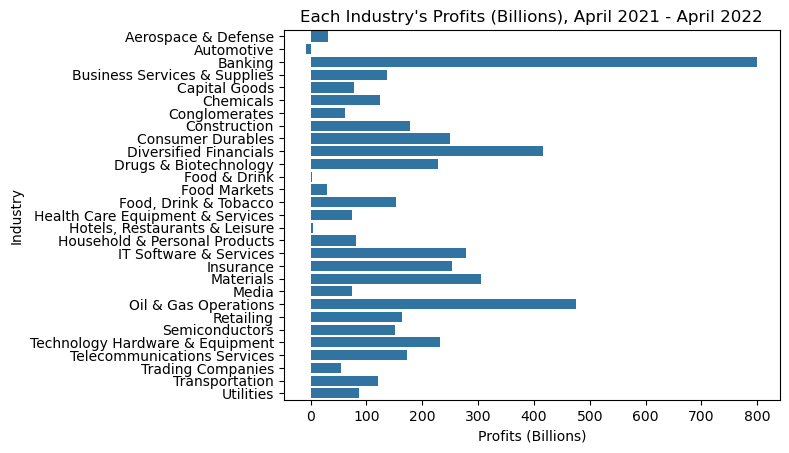

<Figure size 640x480 with 0 Axes>

In [661]:
sns.barplot(data=new_industry_profit,y='Industry',x='Profits')
plt.title('Each Industry\'s Profits (Billions), April 2021 - April 2022')
plt.xlabel('Profits (Billions)')
plt.show()
plt.clf()

Using this graph and the table above it, we can see that in the April 2021 - April 2022 financial year **banking** had the most amount of overall profits. Coming in with **$799,890,000,000 in profits**. *(Also thought it would be a good idea to note that the Automotive industry had negative 7.72 Billion in profits)*

## Question 2: Is there a correlation between an organizations profits and their employee count?

First lets take a peek at a scatter plot that shows the organizations employee count and Profits

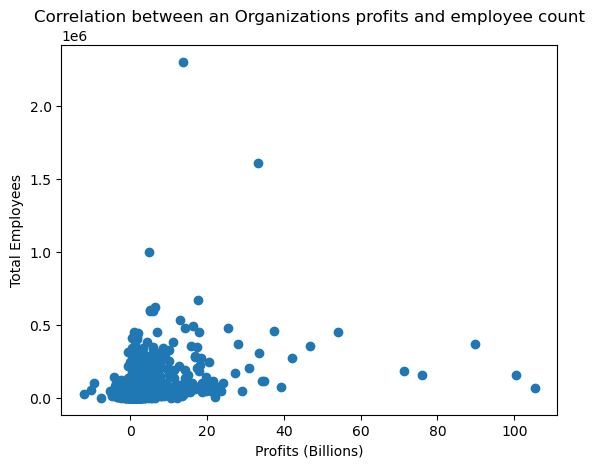

<Figure size 640x480 with 0 Axes>

In [652]:
plt.scatter(x=forbes['Profits'],y=forbes['total_employees'])
plt.title('Correlation between an Organizations profits and employee count')
plt.ylabel('Total Employees')
plt.xlabel('Profits (Billions)')
plt.show()
plt.clf()

By taking a look at this scatter plot a strong correlation between the two variables is not very visible.

Lets dive deeper and see if we can find anything else out!

To help us conclude if there is a correlation between the two variables we will import the personr module to see if we can find a linear association:

In [400]:
from scipy.stats import pearsonr
corr_profits_employees, p = pearsonr(forbes['Profits'],forbes['total_employees'])
display(corr_profits_employees)

0.32728013081783025

This is interesting! There is a pearson correlation of above 0.3 which indicates there is a linear association between the two variables.

## Question 3: What organization made the most amount of profits?

First lets create a new dataframe containing the organizations and their profits:

In [412]:
organization_profits = forbes[['organization_name','Profits']]
display(organization_profits.head())

,organization_name,Profits
0,Berkshire Hathaway,89.80
1,ICBC,54.03
2,Saudi Arabian Oil Company (Saudi Aramco),105.36
3,JPMorgan Chase,42.12
4,China Construction Bank,46.89


Now lets find the organizations with the most profits:

In [437]:
display(organization_profits.groupby('Profits').max())

,organization_name
Profits,
-12.05,Kuaishou Technology
-10.19,Telecom Italia
-9.42,Carnival Corporation
-7.96,Hainan Airlines Holding
-7.64,DiDi Global
...,...
71.18,Microsoft
76.03,Alphabet
89.80,Berkshire Hathaway


Here we can see that during the April 2021 - April 2022 Financial year the "Saudi Arabian Oil Company (Saudi Aramco)" had the most amount of profits with apple following close behind. A total of **$105,360,000,000** in profits (105 Bil).

## Question 4: Is there a correlation between an organizations origin country and profits?

First lets create a scatter graph to represent the distribution of the profits for organizations in each country:

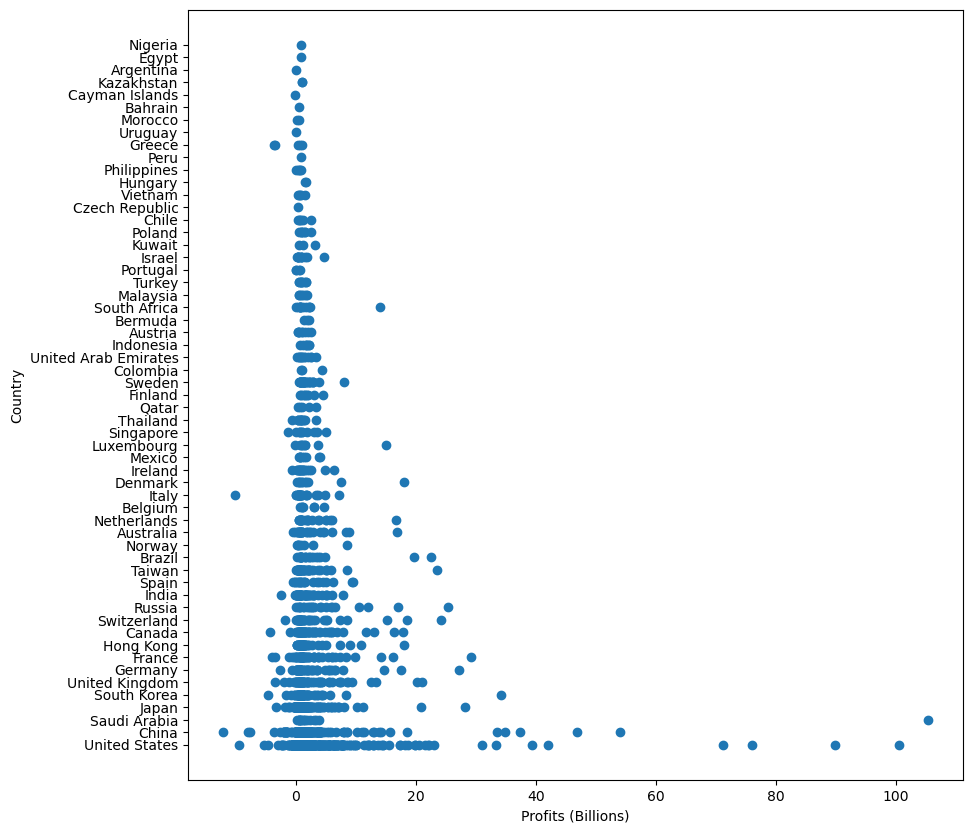

<Figure size 640x480 with 0 Axes>

In [549]:
plt.figure(figsize=[10,10])
plt.scatter(y=forbes['Country'],x=forbes['Profits'])
plt.ylabel('Country')
plt.xlabel('Profits (Billions)')
plt.show()
plt.clf()

In the graph above we can see a strong relationship between an organizations origin country and their profits. 
For example, an organization that was created in the United States seems more likely to produce higher profit margins comparied to organizations created in other countries.

## Question 5: Is there a correlation between an organizations age and its profits?

To start lets create a new column that shows the age of the organization:

In [572]:
forbes['Age'] = 2022 - forbes['year_founded']
display(forbes.head())

,2022_ranking,organization_name,Industry,Country,year_founded,CEO,Revenue,Profits,Assets,market_value,total_employees,Age
0,1,Berkshire Hathaway,Diversified Financials,United States,1939,Warren Edward Buffett,276.09,89.80,958.78,741.48,372000,83
1,2,ICBC,Banking,China,1984,Shu Gu,208.13,54.03,5518.51,214.42,449296,38
2,3,Saudi Arabian Oil Company (Saudi Aramco),Oil & Gas Operations,Saudi Arabia,1933,Amin bin Hasan Al-Nasser,400.38,105.36,576.04,2292.08,68493,89
3,4,JPMorgan Chase,Diversified Financials,United States,2000,Jamie Dimon,124.54,42.12,3954.69,374.45,271025,22
4,5,China Construction Bank,Banking,China,2014,Wang Zuji,202.07,46.89,4746.95,181.32,352621,8


Now lets create a scatter plot to visualise if there is a correlation between an organizations profits and age.

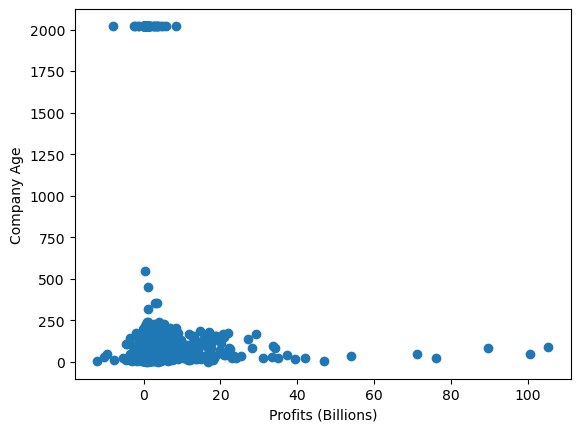

<Figure size 640x480 with 0 Axes>

In [578]:
plt.scatter(x=forbes['Profits'],y=forbes['Age'])
plt.xlabel('Profits (Billions)')
plt.ylabel('Company Age')
plt.show()
plt.clf()

This has brought up an issue! If you noticed there are some outliers at the top of the graph, this means that there are rows where "year_founded" is null or equal to 0.

Lets check the datatype of the column and see if there are any missing values:

In [590]:
display(forbes['Age'].dtypes)
display(forbes['Age'].isnull().any())

dtype('int64')

False

This means that there rows that have "year_founded" equal to 0. Because of there being so many rows being inputed as 0 it may affect the accuracy of the results, as such im going to remove these rows from the analysis of this question:

In [632]:
forbes = forbes[forbes['Age'] != 2022]

Now lets retry creating the scatter plot:

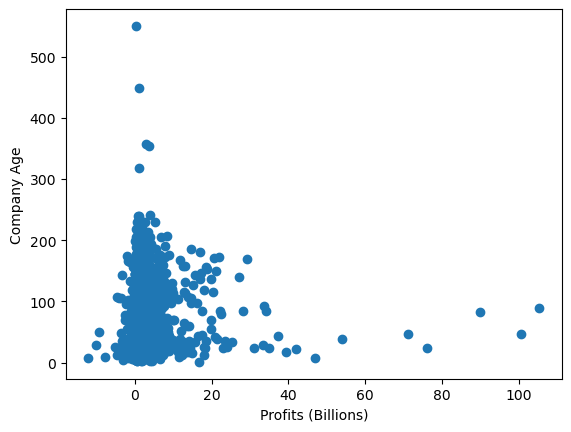

<Figure size 640x480 with 0 Axes>

In [644]:
plt.scatter(x=forbes['Profits'],y=forbes['Age'])
plt.xlabel('Profits (Billions)')
plt.ylabel('Company Age')
plt.show()
plt.clf()

In this graph we can see a slight linear incline. Lets check if there is a strong enough linear association for the two variables to have an association:

In [649]:
corr_age_profits, p = pearsonr(forbes.Profits,forbes.Age)
display(corr_age_profits)

0.04621101792054036

A result of 0.04 is not high enough to suggest a correlation between age and profits in the April 2021 - April 2022 Financial Year.